# Import Packages

In [1]:
import os  # Interact with the operating system.
import sys  # Read system parameters.
import time as time

import matplotlib as mpl  # Create charts.
import matplotlib.pyplot as plt
import numpy as np  # Work with multi-dimensional arrays and matrices.
import pandas as pd  # Manipulate and analyze data frames.
import seaborn as sb  # Streamline charting.
import sklearn  # Perform feature engineering and machine learning.

# Summarize software libraries used.
print("Libraries used in this project:")
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- scikit-learn {}".format(sklearn.__version__))
print("- Matplotlib {}".format(mpl.__version__))
print("- Seaborn {}".format(sb.__version__))
print("- Python {}\n".format(sys.version))

Libraries used in this project:
- NumPy 1.22.3
- pandas 1.4.1
- scikit-learn 1.2.2
- Matplotlib 3.8.4
- Seaborn 0.13.0
- Python 3.9.20 (main, Oct  3 2024, 02:27:54) 
[Clang 14.0.6 ]



# Load the Data

In [2]:
PATH = os.path.join(".", "data")
print("Data files in this project:", os.listdir(PATH))

housing = os.path.join(PATH, "cali_house_data.pickle")
df = pd.read_pickle(housing)
print("\nLoaded {} housing records from {}.".format(len(df), housing))

Data files in this project: ['.ipynb_checkpoints', 'cali_house_data.pickle']

Loaded 20640 housing records from ./data/cali_house_data.pickle.


**View Sample Data**

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Explore the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


**Spotlights**

- The dataset consists of 20,640 entries and 9 attributes.
- Every attribute is represented by floating-point numbers.
- There are no gaps in the data; every entry is complete across all attributes.
- Each attribute reflects a specific characteristic of a block group of homes in California. A block group, as defined by the U.S. Census Bureau, is a geographical unit that includes several census blocks, which are the smallest units representing multiple homes in a given area.
- The attributes/features are:
    - **target** variable represents the median home value in the block group, expressed in hundreds of thousands of dollars.
    - **MedInc** represents the average income level of residents within the block group.
    - **HouseAge** indicates the average age of the homes in the block group, measured in years.
    - **AveRooms** refers to the average count of rooms found in the houses of the block group.
    - **AveBedrms** signifies the average number of bedrooms present in the homes within the block group.
    - **Population** denotes the total number of individuals living in the block group.
    - **AveOccup** reflects the average number of people residing in each house in the block group.
    - **Latitude** provide the geographical coordinates of the block group.
    - **Longitude** provide the geographical coordinates of the block group.
    

### Evaluate Feature Distributions

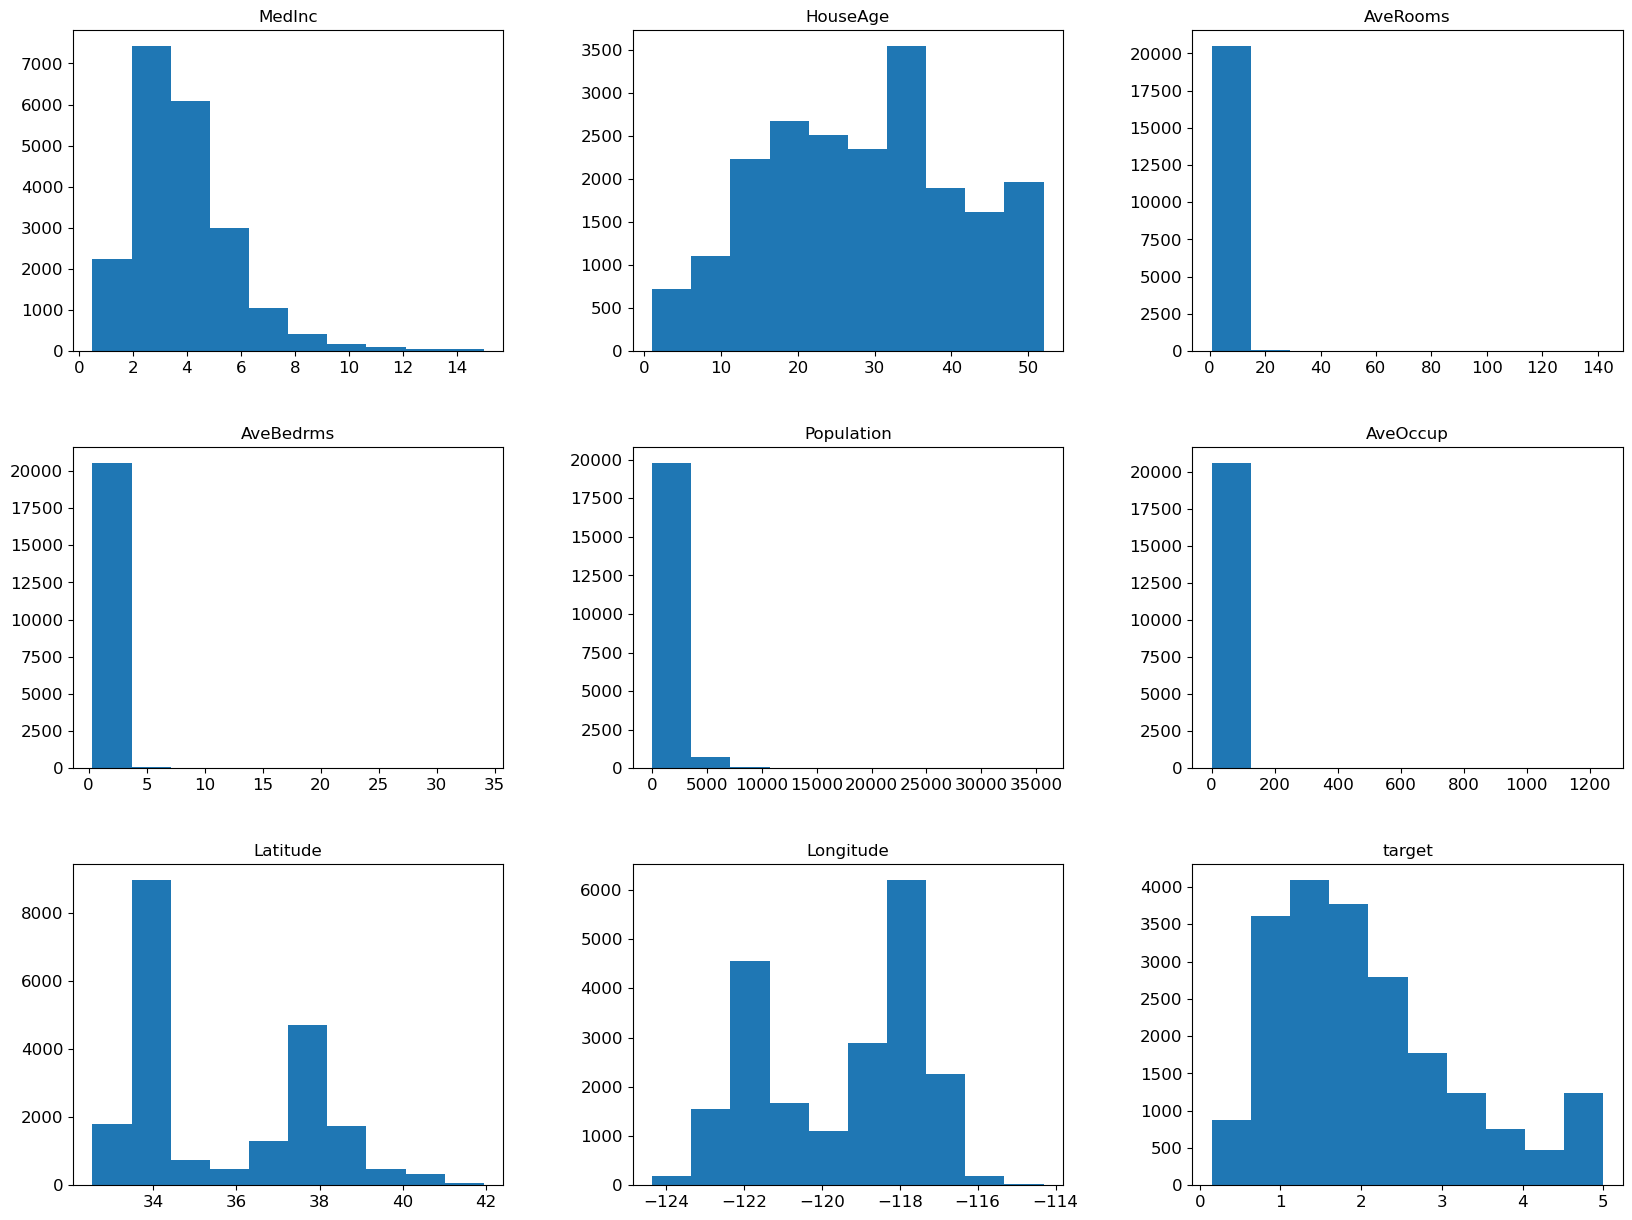

<Figure size 640x480 with 0 Axes>

In [6]:
%matplotlib inline
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

df.hist(figsize=(20, 15), grid=False)
plt.figure();

**Spotlights**

- The median income distribution skewed towards the right, showing that many residents earn lower incomes. It's important to investigate the outliers more thoroughly.
- House ages vary, with a noticeable increase around the 35-year mark.
- The average figures for rooms, bedrooms, total population, and occupants are significantly right skewed, indicating some very high outliers.
- The median house value appears to be slightly right skewed, with the majority of homes valued just below $200,000.
- The data suggests a trend where a small number of high-value homes impact the overall averages significantly.

### Evaluate Summary Statistics

In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Spotlights** 

The scales of the features appear to be imbalanced, particularly when looking at lower-scale features such as MedInc, which has a mean of 3.87, compared to higher-scale features like Population, with a mean of 1,425.48.

#### Calculate Pearson's Correlation Coefficient

In [8]:
"""- Utilize the Pearson correlation coefficient to assess the connections between target and various factors."""

print("Pearson correlations with target")
df.corr()["target"].sort_values(ascending=False)

Pearson correlations with target


target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64

### Examine Correlations with '**target**'

- 
- 
- 

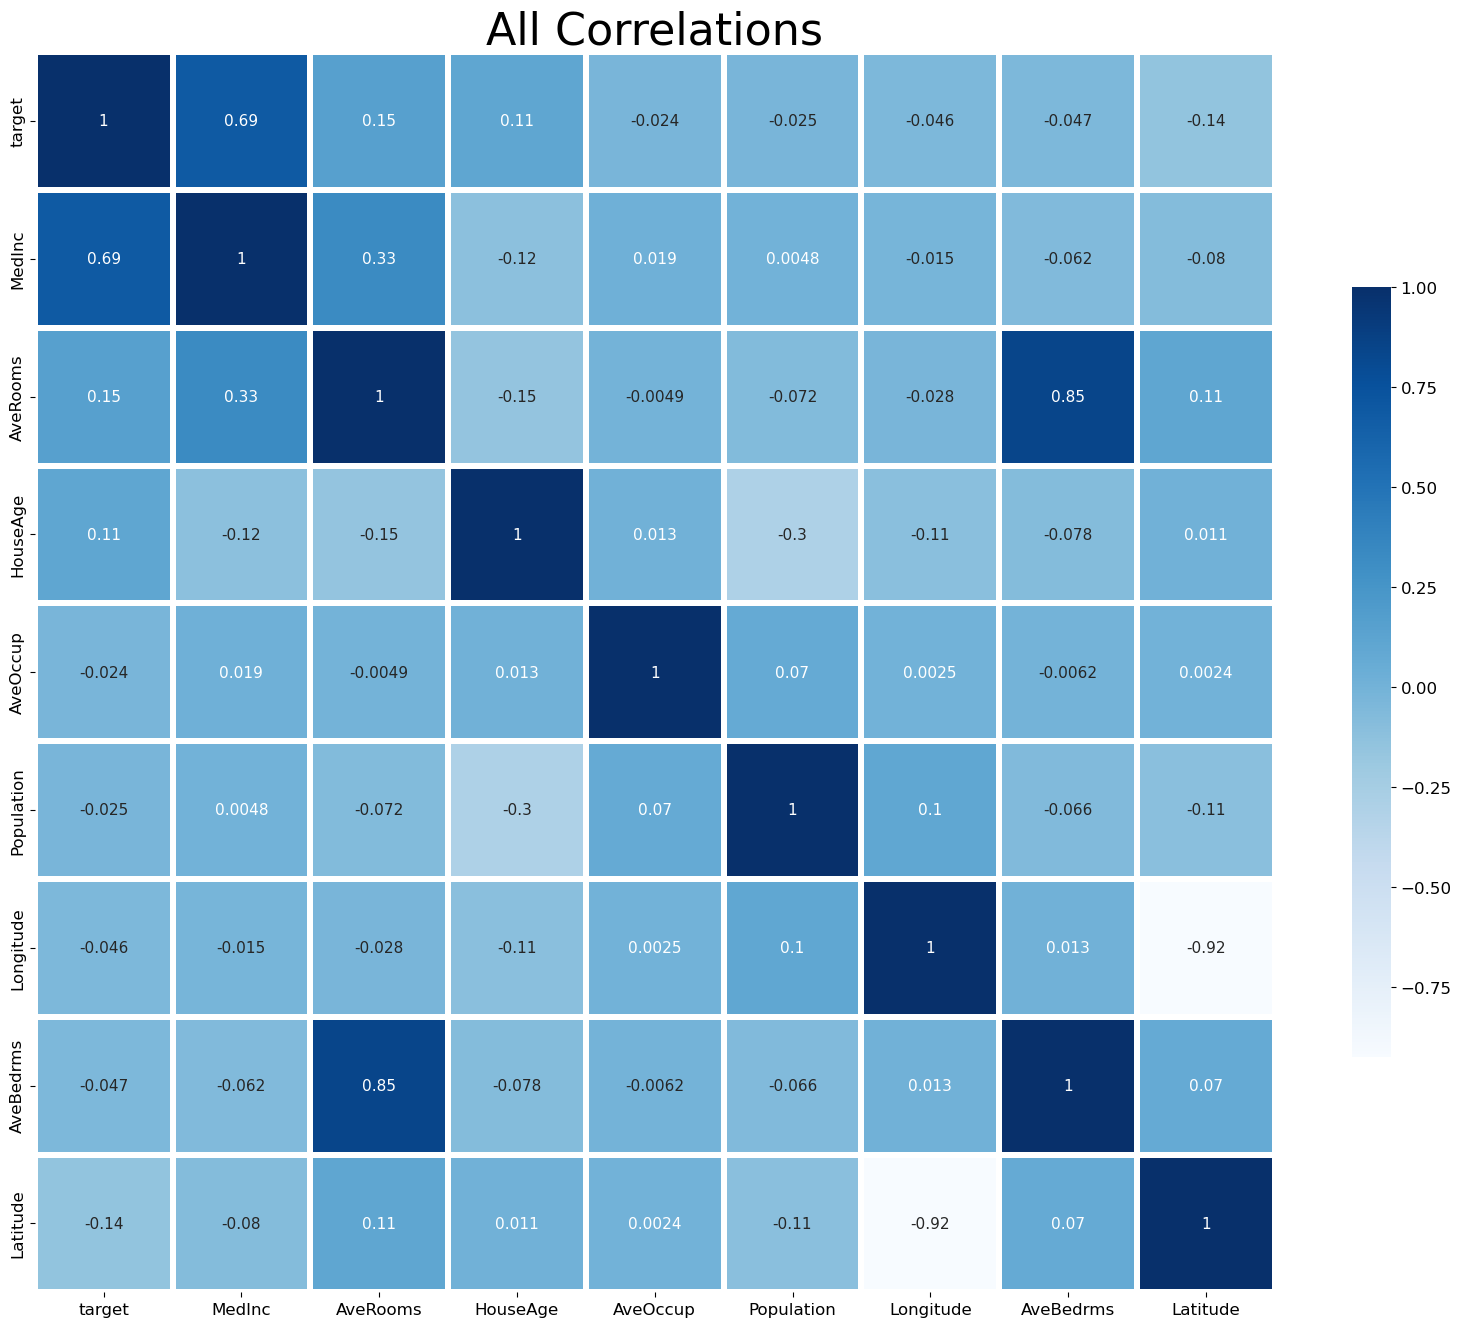

In [9]:
"""Specify the dimensions and title of the visualization, then create a heatmap to display the correlation matrix."""

f, axes = plt.subplots(figsize=(20, 20))
plt.title("All Correlations", fontsize=32)


"""Rearrange the features to correspond with the Pearson's Correlation results for enhanced visualization clarity."""
features = [
    "target",
    "MedInc",
    "AveRooms",
    "HouseAge",
    "AveOccup",
    "Population",
    "Longitude",
    "AveBedrms",
    "Latitude",
]

"""Generate the heatmap representation of the correlation matrix."""
sb.heatmap(
    df[features].corr(),
    linewidths=3.0,
    square=True,
    cmap="Blues",
    linecolor="w",
    annot=True,
    annot_kws={"size": 11},
    cbar_kws={"shrink": 0.5},
);

- The primary factor showing a significant relationship with median house value is MedInc.
- AveRooms and Latitude exhibit minor correlations, with AveRooms being positive and Latitude negative.

## Detect Anomalies in the Data.

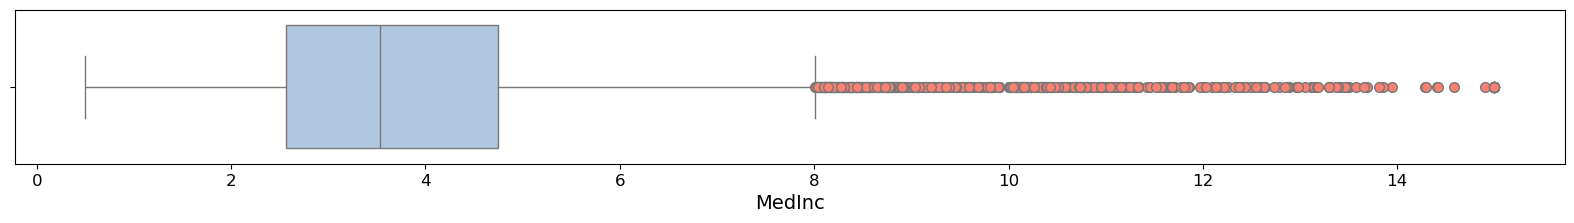

In [23]:
plt.figure(figsize=(20, 2))
bplot = sb.boxplot(
    x="MedInc",
    data=df,
    orient="h",
    fliersize=7,
    color="#A7C7E7",
    flierprops={"markerfacecolor": "salmon", "marker": "o"},
)

**Spotlights** 

- MedInc represents the median income level of people living in a specific census block group.
- It seems there are a few higher-than-average values that stand out in the data.
- Typically, the median income for a particular area tends to be under 8.
- The outliers begin to diminish around the value of 14, although there are still a few notable exceptions that spike up to around 16.

## Isolate MedInc from the target variable for clarity.

To begin, focus on a single characteristic, specifically MedInc, in relation to the target variable, which is the median house value. As the process continues, the model will incorporate additional features for training.

In [24]:
X = np.array(df["MedInc"]).reshape(-1, 1)
y = np.array(df["target"])

### Analyze a scatter plot showcasing MedInc against the target.


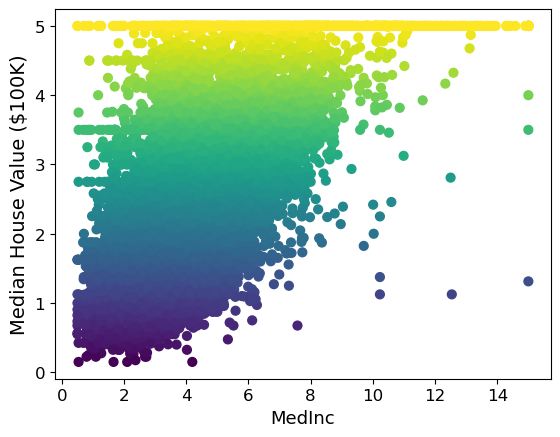

In [27]:
plt.scatter(
    X,
    y,
    s=40,
    c=y,
)

plt.xlabel("MedInc", fontsize=13)
plt.ylabel("Median House Value ($100K)");

**Spotlights**

It is interesting to observe how these factors interact in the housing market!
- Typically, a home's worth rises alongside the income levels of the people living nearby.
- Additionally, there are noticeable exceptions located at the far right of the x-axis.
